In [ ]:
!pip3 install scikit-learn pandas keras opencv-python --user --upgrade

In [1]:
# import the necessary packages

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import NASNetMobile
from keras.layers import Input, AveragePooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop, Adagrad
from keras import regularizers
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
#import cv2

Using TensorFlow backend.


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# Load data: images and labels

data = []
labels = []

In [4]:
data = np.array(np.load("../data/all_images_kimeye.npy"))
labels = np.array(np.load("../data/all_labels_kimeye.npy"))
labels = labels.astype(int)

In [4]:
"""
data2 = np.array(np.load("../data/all_images_acrima.npy"))
labels2 = np.array(np.load("../data/all_labels_acrima.npy"))
labels2 = labels2.astype(int)
"""

In [11]:
"""
data = np.concatenate((data1, data2), axis=0)
labels = np.concatenate((labels1, labels2), axis=0)
"""
print(data.shape)
print(labels[0])


(1544, 224, 224, 3)
0


In [5]:
# shuffle the whole dataset

shuffle = list(zip(data, labels))
np.random.seed(42)
np.random.shuffle(shuffle)
data = np.array([shuffle[i][0] for i in range(len(shuffle))])
labels = np.array([shuffle[i][1] for i in range(len(shuffle))])
del shuffle


In [6]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = np_utils.to_categorical(labels)

data = np.array(data)
print(labels)
#labels = np.array(labels)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [0]:
"""
plt.imshow(data[254])
plt.show()
print(labels[254])

plt.imshow(data[1])
plt.show()
print(labels[1])
"""

'\nplt.imshow(data[254])\nplt.show()\nprint(labels[254])\n\nplt.imshow(data[1])\nplt.show()\nprint(labels[1])\n'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


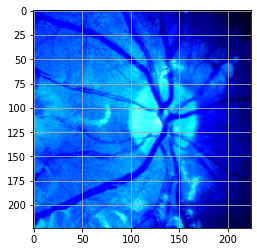

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0.]


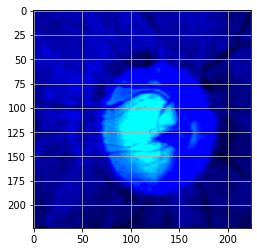

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1.]


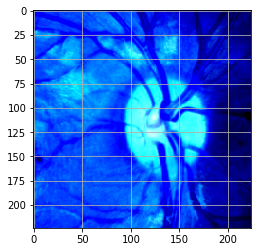

[1. 0.]


In [7]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, 
	test_size=0.2, random_state=42)

plt.grid(None)

plt.imshow(trainX[10])
plt.show()
print(trainY[10])

plt.grid(None)

plt.imshow(testX[276])
plt.show()
print(testY[276])

plt.grid(None)

plt.imshow(testX[208])
plt.show()
print(testY[208])

In [8]:
# initialize the training data augmentation object

trainAug = ImageDataGenerator(
	rotation_range=40,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.2,
	horizontal_flip=True,
	vertical_flip=True,
	fill_mode="nearest")

# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug = ImageDataGenerator()

# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation
# objects
#mean = np.array([123.68, 116.779, 103.939], dtype="float32")
#trainAug.mean = mean
#valAug.mean = mean

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Labels: [array([1., 0.], dtype=float32), array([1., 0.], dtype=float32), array([1., 0.], dtype=float32), array([1., 0.], dtype=float32), array([1., 0.], dtype=float32), array([1., 0.], dtype=float32), array([1., 0.], dtype=float32), array([1., 0.], dtype=float32)]


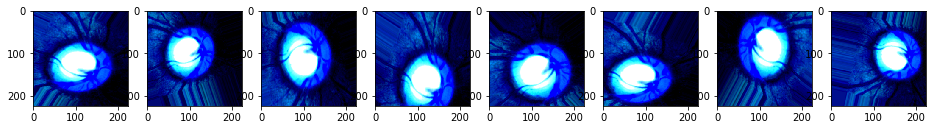

In [34]:
# visualize the different geometric transformations operated to the images

img_id = 600
cat_generator = trainAug.flow(trainX[img_id:img_id+1], 
 trainY[img_id:img_id+1], 
 batch_size=1) 
cat = [next(cat_generator) for i in range(0,8)] 
fig, ax = plt.subplots(1,8, figsize=(16, 6))

print('Labels:', [item[1][0] for item in cat]) 
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,8)]

In [29]:
# load InceptionV3, ensuring the head FC layer sets are left off, while at
# the same time adjusting the size of the input image tensor to the
# network
baseModel = NASNetMobile(weights="imagenet", include_top=True,
	input_tensor=Input(shape=(224, 224, 3)))

24231936/24227760 [==============================] - 3s 0us/step


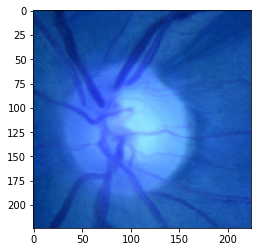

AttributeError: 'Tensor' object has no attribute 'predict'

In [27]:
i = 3
image = np.expand_dims(testX[i], axis=0)
plt.imshow(testX[i])
plt.show()
feature_map = baseModel.predict(image)
print(feature_map.shape)
plt.imshow(feature_map[0,:,:,384])
plt.show()

In [30]:
# show a summary of the base model
print("[INFO] summary for base model...")
print(baseModel.summary())

[INFO] summary for base model...
Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_753 (Activation)     (None, 111, 111, 32) 0           stem_bn1[0][0]                   
____________________________________________________________

Total params: 5,326,716
Trainable params: 5,289,978
Non-trainable params: 36,738
__________________________________________________________________________________________________
None


In [24]:
# construct the head of the model that will be placed on top of the
# the base model
layer_index = -1
headModel = baseModel.layers[layer_index].output

headModel = GlobalAveragePooling2D()(headModel)

# let's add a fully-connected layer
hidden_units = 512
dropout_rate = 0.5

headModel = Dense(hidden_units, activation='relu')(headModel)
headModel = Dropout(dropout_rate)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [49]:
print(len(baseModel.layers))

769


In [25]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
   layer.trainable = False

In [19]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_189 (Activation)     (None, 111, 111, 32) 0           stem_bn1[0][0]                   
____________________________________________________________________________________________

                                                                 separable_conv_2_bn_normal_right1
__________________________________________________________________________________________________
normal_add_2_6 (Add)            (None, 14, 14, 88)   0           separable_conv_2_bn_normal_left2_
                                                                 separable_conv_2_bn_normal_right2
__________________________________________________________________________________________________
normal_add_3_6 (Add)            (None, 14, 14, 88)   0           normal_left3_6[0][0]             
                                                                 adjust_bn_6[0][0]                
__________________________________________________________________________________________________
normal_add_4_6 (Add)            (None, 14, 14, 88)   0           normal_left4_6[0][0]             
                                                                 normal_right4_6[0][0]            
__________

In [26]:
# compile our model (this needs to be done after our setting our
# layers to being non-trainable)
print("[INFO] compiling model...")
#opt = Adam(lr=1e-4)
#opt = RMSprop(lr=1e-4)
lr = 1e-4
momentum = 0.9
decay=1e-6
opt = SGD(lr=lr, momentum=momentum)
#opt = Adagrad(lr=1e-4, decay=1e-6)

model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
opt_name, _ = str(opt)[18:].split(' ', 1)
print(opt_name)

[INFO] compiling model...
SGD


In [27]:
epochs = 100
batch_size = 8

# train the head of the network for a few epochs (all other layers
# are frozen) -- this will allow the new FC layers to start to become
# initialized with actual "learned" values versus pure random
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=batch_size),
	steps_per_epoch=len(trainX) // batch_size,
	validation_data=valAug.flow(testX, testY),
	validation_steps=len(testX) // batch_size,
	epochs=epochs)

[INFO] training head...
Epoch 1/100
154/154 [==============================] - 29s 191ms/step - loss: 0.7403 - accuracy: 0.5568 - val_loss: 0.6751 - val_accuracy: 0.4455
Epoch 2/100
154/154 [==============================] - 15s 97ms/step - loss: 0.6322 - accuracy: 0.6498 - val_loss: 0.8242 - val_accuracy: 0.4539
Epoch 3/100
154/154 [==============================] - 15s 97ms/step - loss: 0.6102 - accuracy: 0.6699 - val_loss: 0.7832 - val_accuracy: 0.4582
Epoch 4/100
154/154 [==============================] - 15s 100ms/step - loss: 0.5984 - accuracy: 0.6862 - val_loss: 0.9104 - val_accuracy: 0.4505
Epoch 5/100
154/154 [==============================] - 15s 100ms/step - loss: 0.5905 - accuracy: 0.6976 - val_loss: 0.8336 - val_accuracy: 0.4633
Epoch 6/100
154/154 [==============================] - 16s 102ms/step - loss: 0.5561 - accuracy: 0.7205 - val_loss: 0.9004 - val_accuracy: 0.4489
Epoch 7/100
 78/154 [==============>...............] - ETA: 5s - loss: 0.5424 - accuracy: 0.7244

KeyboardInterrupt: 

In [43]:
# evaluate the network

print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1)))


[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.74      0.07      0.12       209
           1       0.47      0.97      0.63       177

    accuracy                           0.48       386
   macro avg       0.60      0.52      0.38       386
weighted avg       0.61      0.48      0.36       386



In [44]:
score = model.evaluate(testX, testY,batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7786560175950046
Test accuracy: 0.4818652868270874


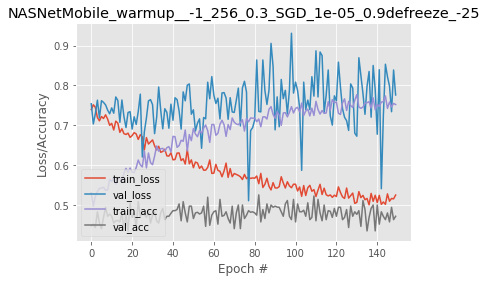

In [73]:
# plot the training loss and accuracy

N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
title = "NASNetMobile_warmup_" + '_' + str(layer_index) + '_' + str(hidden_units) + '_' + str(dropout_rate) + '_' + opt_name + '_' + str(lr) + '_' + str(momentum) + 'defreeze_-25'
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('../evaluation/NASNetMobile/plots/' + title + '.png')

In [0]:
plt.savefig('drive/My Drive/inceptionv3_warm_up_performance.png')
#model.save("drive/My Drive/inceptionv3_warm_up_model.h5")

<Figure size 432x288 with 0 Axes>

In [0]:
# initialize the training data augmentation object

trainAug2 = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug2 = ImageDataGenerator()

# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation
# objects
#mean = np.array([123.68, 116.779, 103.939], dtype="float32")
#trainAug2.mean = mean
#valAug2.mean = mean


In [0]:
"""
trainAug2 = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset   
        samplewise_center=False,  # set each sample mean to 0   
        featurewise_std_normalization=False,  # divide inputs by std of the dataset   
        samplewise_std_normalization=False,  # divide each input by its std  
        zca_whitening=False,  # apply ZCA whitening     
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)  <<1    0 => 30
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.2,  # set range for random shear  <<3<<4  0 => 0.1 => 0.2
        zoom_range=0.3,  # set range for random zoom    <<1<<2<<3   0 => 0.1 => 0.2 =>0.3 
        channel_shift_range=0.2,  # set range for random channel shifts     <<5<<6   0.=>0.1=>0.2
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"     
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images    <<1    false => True
        # set rescaling factor (applied before any other transformation)
        rescale=None,   
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
"""

'\ntrainAug2 = ImageDataGenerator(\n        featurewise_center=False,  # set input mean to 0 over the dataset   \n        samplewise_center=False,  # set each sample mean to 0   \n        featurewise_std_normalization=False,  # divide inputs by std of the dataset   \n        samplewise_std_normalization=False,  # divide each input by its std  \n        zca_whitening=False,  # apply ZCA whitening     \n        zca_epsilon=1e-06,  # epsilon for ZCA whitening\n        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)  <<1    0 => 30\n        # randomly shift images horizontally (fraction of total width)\n        width_shift_range=0.1,\n        # randomly shift images vertically (fraction of total height)\n        height_shift_range=0.1,\n        shear_range=0.2,  # set range for random shear  <<3<<4  0 => 0.1 => 0.2\n        zoom_range=0.3,  # set range for random zoom    <<1<<2<<3   0 => 0.1 => 0.2 =>0.3 \n        channel_shift_range=0.2,  # set range for rand

In [0]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
#for i, layer in enumerate(baseModel.layers):
   #print(i, layer.name)

In [0]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

In [0]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_283 (Conv2D)             (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_283 (BatchN (None, 111, 111, 32) 96          conv2d_283[0][0]                 
__________________________________________________________________________________________________
activation_283 (Activation)     (None, 111, 111, 32) 0           batch_normalization_283[0][0]    
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
#for layer in baseModel.layers[30:]:
	#layer.trainable = True

In [0]:
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [0]:
epochs = 150

# train the head of the network for a few epochs (all other layers
# are frozen) -- this will allow the new FC layers to start to become
# initialized with actual "learned" values versus pure random
print("[INFO] training network...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, shuffle=True, batch_size=32),
	steps_per_epoch=len(trainX) // 32,
	validation_data=valAug.flow(testX, testY),
	validation_steps=len(testX) // 32,
	epochs=epochs)


[INFO] training network...
Epoch 1/150
36/36 [==============================] - 40s 1s/step - loss: 0.5006 - acc: 0.7618 - val_loss: 0.6260 - val_acc: 0.6745
Epoch 2/150
36/36 [==============================] - 26s 733ms/step - loss: 0.5035 - acc: 0.7682 - val_loss: 0.6412 - val_acc: 0.6667
Epoch 3/150
36/36 [==============================] - 27s 752ms/step - loss: 0.4946 - acc: 0.7707 - val_loss: 0.6568 - val_acc: 0.6525
Epoch 4/150
36/36 [==============================] - 27s 741ms/step - loss: 0.4703 - acc: 0.7818 - val_loss: 0.6335 - val_acc: 0.6695
Epoch 5/150
36/36 [==============================] - 27s 740ms/step - loss: 0.4607 - acc: 0.7802 - val_loss: 0.5638 - val_acc: 0.7232
Epoch 6/150
36/36 [==============================] - 27s 755ms/step - loss: 0.4921 - acc: 0.7708 - val_loss: 0.6574 - val_acc: 0.6525
Epoch 7/150
36/36 [==============================] - 26s 727ms/step - loss: 0.4385 - acc: 0.7987 - val_loss: 0.6106 - val_acc: 0.7062
Epoch 8/150
36/36 [===================

In [0]:
# plot the training loss and accuracy

N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


In [0]:
plt.savefig('drive/My Drive/vgg16_fine_tuned_performance.png')
model.save("drive/My Drive/vgg16_fine_tuned_model_0.h5")

In [0]:
score = model.evaluate(testX, testY,batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [0]:
repository = 'drive/My Drive/17.png'
repository2 = 'drive/My Drive/5.png'
repository3 = 'drive/My Drive/dataset/Test/glaucomatous/drishtiGS_001.png'
repository4 = 'drive/My Drive/dataset/Training/healthy/drishtiGS_008.png'

test_image = cv2.imread(repository4)
plt.imshow(test_image)

test_image = test_image/255
test_image = np.resize(test_image, (224,224,3))
test_image = np.expand_dims(test_image, axis=0)
print(test_image.shape)


pred = model.predict(test_image) # ADD CODE HERE
print(pred)
#print(preds)
label = np.argmax(pred) # ADD CODE HERE
print(label)
